Pymaceuticals Inc.
Analysis
4 diffrent medications were used/tested on mice to helpo reduce the size of tumors. it appears the infubinol and ceftamin are the most affective at reducing tumor size with Capomulin and Ramicane being least affective.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [56]:
# Checking the number of mice.
len(merged_df['Mouse ID'].unique())

249

In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = merged_df[merged_df.duplicated()]
duplicate_mice_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [58]:
# Optional: Get all the data for the duplicate mouse ID. 


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= pd.concat([merged_df, duplicate_mice_ids]).drop_duplicates(keep=False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [60]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_df['Mouse ID'].unique())
number_of_mice

249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
st_dev = clean_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({
                                    "Mean Tumor Volume (mm3)":mean,
                                    "Median Tumor Volume (mm3)": median,
                                    "Variance of Tumor Volume (mm3)":variance,
                                    "Standard Deviation of Tumor Volume (mm3)": st_dev,
                                    "Standard Error of the Mean for Tumor Volume (mm3)":sem,
})

summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean for Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_df = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.414660  50.965298  42.199890  6.496144  0.515178
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

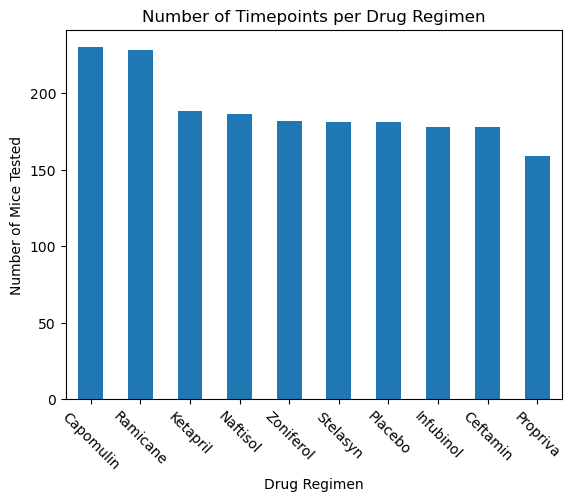

In [96]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugregimen_graph = clean_df['Drug Regimen'].value_counts()

drugregimen_graph.plot(kind = 'bar')
plt.xticks(rotation = 315)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Timepoints per Drug Regimen')
plt.show()


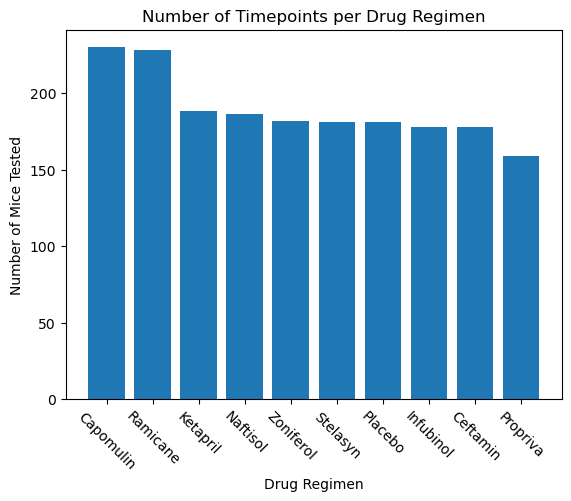

In [95]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drugregimen_graph.index.values, drugregimen_graph.values)
plt.xticks(rotation = 315)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Timepoints per Drug Regimen')
plt.show()


<AxesSubplot:ylabel='Sex'>

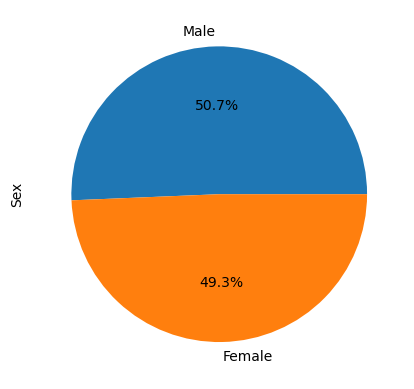

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = clean_df['Sex'].value_counts()
sex.plot(kind='pie', autopct="%1.1f%%")

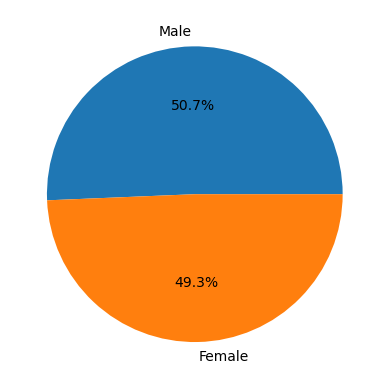

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex.values, labels = sex.index.values, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped = clean_df.groupby(['Mouse ID'])
grouped_tumor = grouped["Timepoint"].max()
grouped_tumor

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grouped_tumor_merge_df = pd.merge(clean_df, grouped_tumor, how="left", on= "Mouse ID")
grouped_tumor_merge_df = grouped_tumor_merge_df.rename (columns= {"Timepoint_y" : "Maximum Timepoint", "Timepoint_x": "Timepoint"})
grouped_tumor_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Maximum Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1886,r944,45,41.581521,2,Capomulin,Male,12,25,45
1887,u364,45,31.023923,3,Capomulin,Male,18,17,45
1888,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1889,x773,45,58.634971,4,Placebo,Female,21,30,45


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in drug_list:
    variable = grouped_tumor_merge_df.loc[grouped_tumor_merge_df["Drug Regimen"] == x, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume.append(variable)

    # Determine outliers using upper and lower bounds
    quartiles = variable.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
Values below 32.81891142624998 could be outliers.
Values above 71.19095325625001 could be outliers.


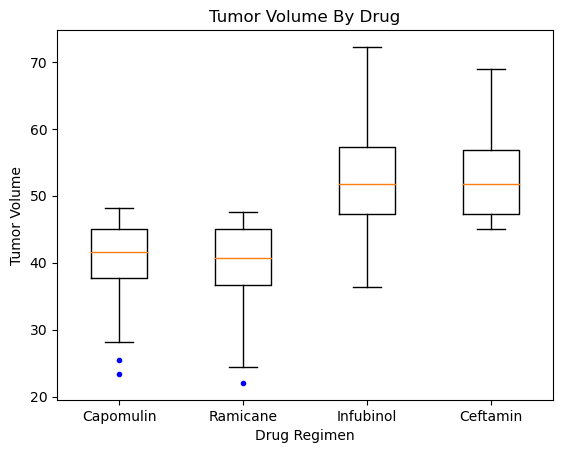

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume By Drug')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(tumor_volume, sym='b.')
positions = [1,2,3,4]
labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
plt.xticks (positions, labels)
plt.show()

## Line and Scatter Plots

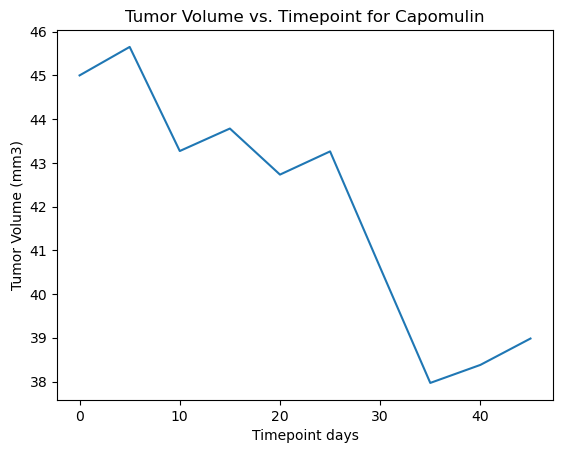

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = grouped_tumor_merge_df.set_index("Mouse ID")

plt.plot(capomulin_df.loc["b128","Timepoint"], capomulin_df.loc["b128","Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint for Capomulin")
plt.xlabel("Timepoint days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_scatter_df = grouped_tumor_merge_df.set_index("Drug Regimen")
capomulin_scatter_df = grouped_tumor_merge_df.loc[grouped_tumor_merge_df["Drug Regimen"] == "Capomulin"]
capomulin_scatter_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Maximum Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
224,j246,0,45.000000,0,Capomulin,Female,21,21,35
225,r554,0,45.000000,0,Capomulin,Female,8,17,45
226,s185,0,45.000000,0,Capomulin,Female,3,17,45
227,b742,0,45.000000,0,Capomulin,Male,7,21,45
...,...,...,...,...,...,...,...,...,...
1852,s710,45,40.728578,1,Capomulin,Female,1,23,45
1857,j119,45,38.125164,1,Capomulin,Female,7,23,45
1876,i557,45,47.685963,1,Capomulin,Female,1,24,45
1886,r944,45,41.581521,2,Capomulin,Male,12,25,45


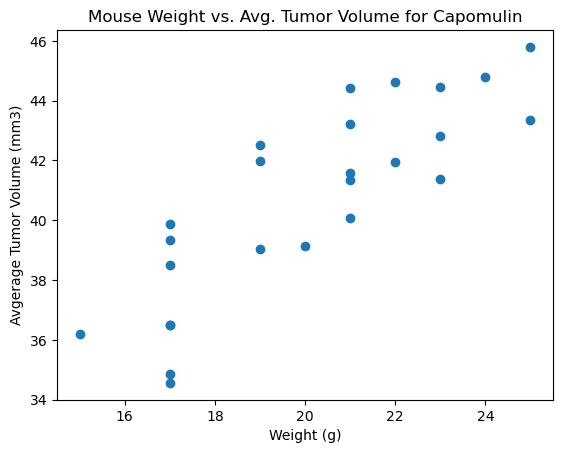

In [88]:
grouped_avg = capomulin_scatter_df.groupby(["Mouse ID"]).mean()
x_values = grouped_avg.loc[:, "Weight (g)"]
y_values = grouped_avg.loc[:, "Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Avgerage Tumor Volume (mm3)')
plt.title("Mouse Weight vs. Avg. Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708723


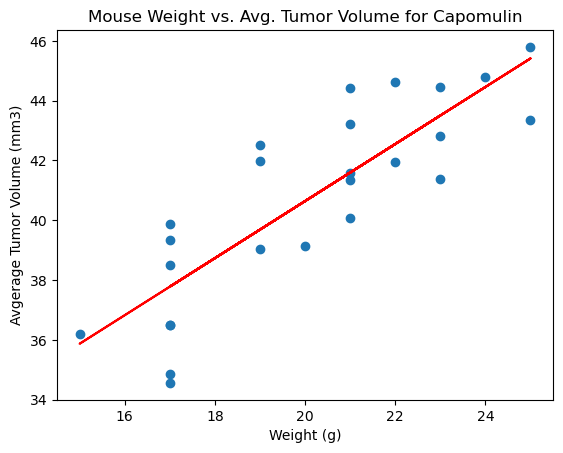

In [87]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# regression model
x_values = grouped_avg.loc[:, "Weight (g)"]
y_values = grouped_avg.loc[:, "Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,100),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Avgerage Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.title("Mouse Weight vs. Avg. Tumor Volume for Capomulin")
plt.show()
